In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head(10)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
5,7.89,2.99
6,6.73,2.60
7,6.75,2.48
8,6.09,2.31
9,8.31,3.51


Text(0, 0.5, 'Lakhs Per annum')

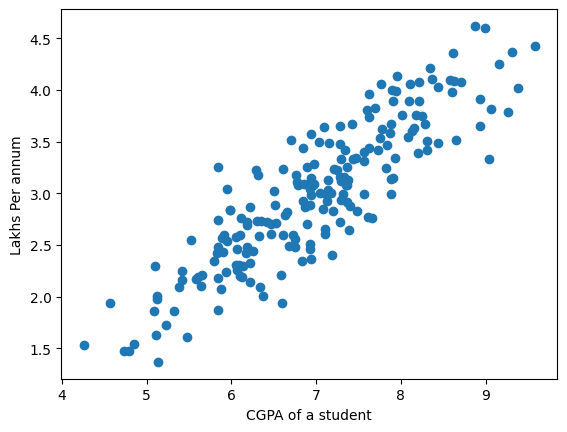

In [85]:
plt.scatter(x = df['cgpa'], y = df['package'])
plt.xlabel('CGPA of a student')
plt.ylabel('Lakhs Per annum')

In [6]:
X = df.iloc[:,0:1]
Y = df.iloc[:, -1]

In [7]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [8]:
Y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train, Y_train)

LinearRegression()

In [14]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [15]:
Y_train

137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
       ... 
43     2.76
22     2.30
72     3.62
15     3.23
168    3.52
Name: package, Length: 160, dtype: float64

In [16]:
import warnings
warnings.filterwarnings('ignore')
lr.predict(X_test.iloc[1].values.reshape(1,1))

array([3.09324469])

Text(0, 0.5, 'Lakhs Per annum')

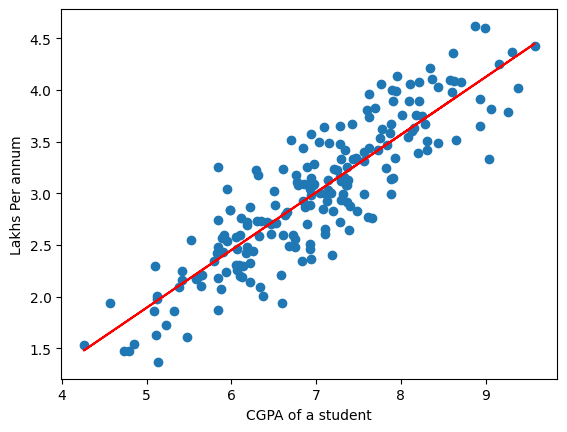

In [19]:
plt.scatter(x = df['cgpa'], y = df['package'])
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.xlabel('CGPA of a student')
plt.ylabel('Lakhs Per annum')


the red line above is the best_fit line and blue dots are sort_of_linear line

Text(0, 0.5, 'Lakhs Per annum')

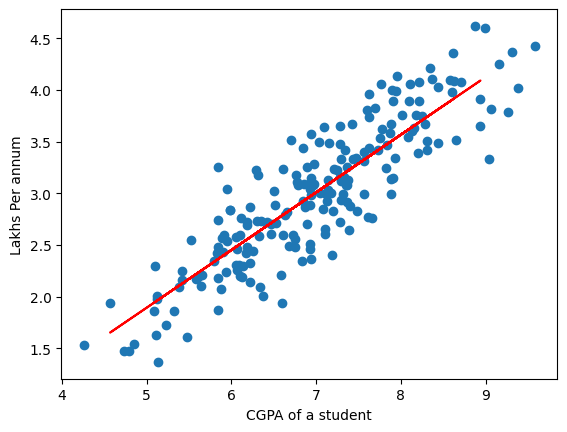

In [20]:
plt.scatter(x = df['cgpa'], y = df['package'])
plt.plot(X_test, lr.predict(X_test), color = 'red')
plt.xlabel('CGPA of a student')
plt.ylabel('Lakhs Per annum')

# now let's find the value of slope and y-intercept

In [21]:
m = lr.coef_

In [22]:
m

array([0.55795197])

In [23]:
b = lr.intercept_

In [24]:
b

-0.8961119222429144

In [25]:
# slope of line 
# y = mx + c

In [26]:
#let's check the lpa for student with gpa 3.01
m  * 3.01 + b

array([0.78332352])

In [27]:
m * 6 + b

array([2.45159992])

# Now, Let's Calculate Regression Metrices

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
Y_predict = lr.predict(X_test)
Y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [30]:
print("MAE = ", mean_absolute_error(Y_test, Y_predict))

MAE =  0.2884710931878175


In [31]:
print("MSE = ", mean_squared_error(Y_test, Y_predict))

MSE =  0.12129235313495527


In [32]:
print("RMSE = ", np.sqrt(mean_squared_error(Y_test, Y_predict)))

RMSE =  0.34827051717731616


In [33]:
print("R2 Score = ", r2_score(Y_test, Y_predict))

R2 Score =  0.780730147510384


In [34]:
#now, let's calculate adjusted R2 Score
#here n is total number of rows 
# k is total number of independent columns (i.e: total features.)
b

In [35]:
adjusted_r2_score = ((1 - r2)*(n - 1)) / (n -1 -k)

In [36]:
print("Adjusted R2 score is : ", adjusted_r2_score)

Adjusted R2 score is :  0.2250401117656585


# FOR NEW DATASET ADDING ONE COLUMN

In [37]:
# Let's Create a new random Column and and add it placement dataset
df1 = df.copy()
df1['rand_feature'] = np.random.random(200)
df1 = df1[['cgpa','rand_feature','package']]

In [38]:
df1.head()

,cgpa,rand_feature,package
0,6.89,0.174064,3.26
1,5.12,0.180799,1.98
2,7.82,0.276103,3.25
3,7.42,0.669222,3.67
4,6.94,0.464328,3.57


Text(0, 0.5, 'Package')

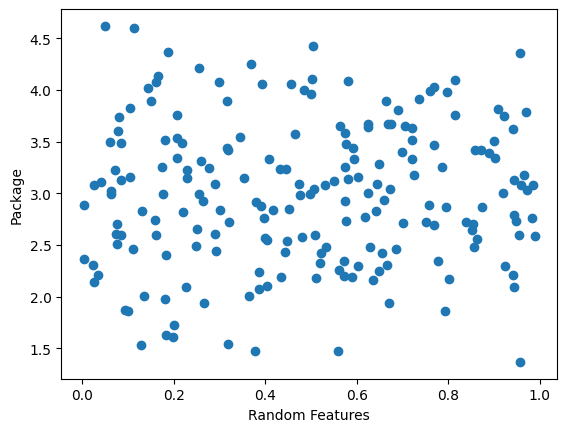

In [39]:
plt.scatter(df1['rand_feature'], df1['package'])
plt.xlabel('Random Features')
plt.ylabel('Package')

In [40]:
x = df1.iloc[:, 0:2]
y = df1.iloc[:, -1]
# print(x)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.2 , random_state= 2)

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred = lr.predict(x_test)

In [45]:
r2_value = r2_score(y_test, y_pred)

In [47]:
r2_value

0.7667288145638476

In [70]:
n1 = x_test.shape[0]
k1 = x_test.shape[1]
adjusted_r2_score = ((1 - r2_value)*(n1 - 1)) / (n1 -1 -k1)
print("Adjusted R2 score is : ", adjusted_r2_score)

Adjusted R2 score is :  0.23624279289393782


# ANOTHER ONE

In [71]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-2,22,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [72]:
new_df2.sample(10)

,cgpa,iq,package
69,7.30,5.04,2.94
52,8.37,5.91,4.11
35,6.87,2.77,2.87
44,5.09,1.76,1.86
65,7.60,3.71,3.81
81,6.10,3.20,2.20
140,7.91,3.65,3.15
29,7.15,4.79,3.49
2,7.82,3.55,3.25
38,8.62,4.16,4.36


Text(0, 0.5, 'Package(in lpa)')

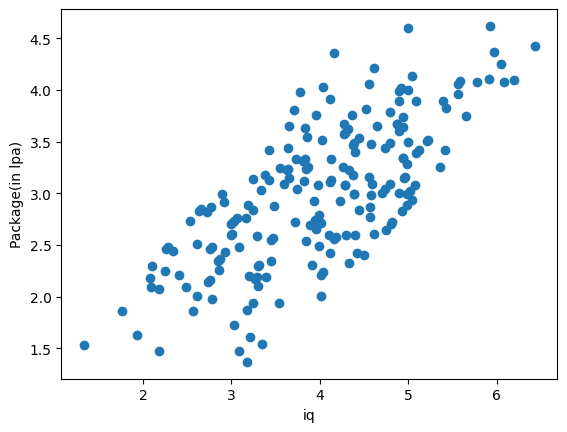

In [73]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [75]:
np.random.randint(-100,100)

22

In [76]:
x_ = new_df2.iloc[:,0:2]
y_ = new_df2.iloc[:,-1]

In [77]:
x__train,x__test,y__train,y__test = train_test_split(x_,y_,test_size=0.2,random_state=2)

In [79]:
lr = LinearRegression()
lr.fit(x__train,y__train)
y__pred = lr.predict(x__test)

In [80]:
r2_val = r2_score(y__test, y__pred)

In [81]:
r2_val

0.8113225239512498

In [83]:
n2 = x_test.shape[0]
k2 = x_test.shape[1]
adjusted_r2_score = ((1 - r2_val)*(n2 - 1)) / (n2 -1 -k2)
print("Adjusted R2 score is : ", adjusted_r2_score)

Adjusted R2 score is :  0.19108101077548587
